In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [163]:
data = pd.read_csv("train.csv", index_col=0)

In [164]:
data.head(5)

,Order Date,Class,Region,Sub-Category,Sales
ID,,,,,
646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
909,30/12/2018,Стандарт,Владивосток,Binders,10612
1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


In [18]:
print(data.shape)
print(data.count())
print(data.columns)
print(data.dtypes)

(9800, 6)
ID              9800
Order Date      9800
Class           9800
Region          9800
Sub-Category    9800
Sales           9800
dtype: int64
Index(['ID', 'Order Date', 'Class', 'Region', 'Sub-Category', 'Sales'], dtype='object')
ID               int64
Order Date      object
Class           object
Region          object
Sub-Category    object
Sales           object
dtype: object


In [19]:
data.isnull().sum()

,0
ID,0
Order Date,0
Class,0
Region,0
Sub-Category,0
Sales,0


In [99]:
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        axes.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

## Задание 1

Ниже представлена стобчатая диаграмма частоты покупок каждой подгруппы за все время продаж.

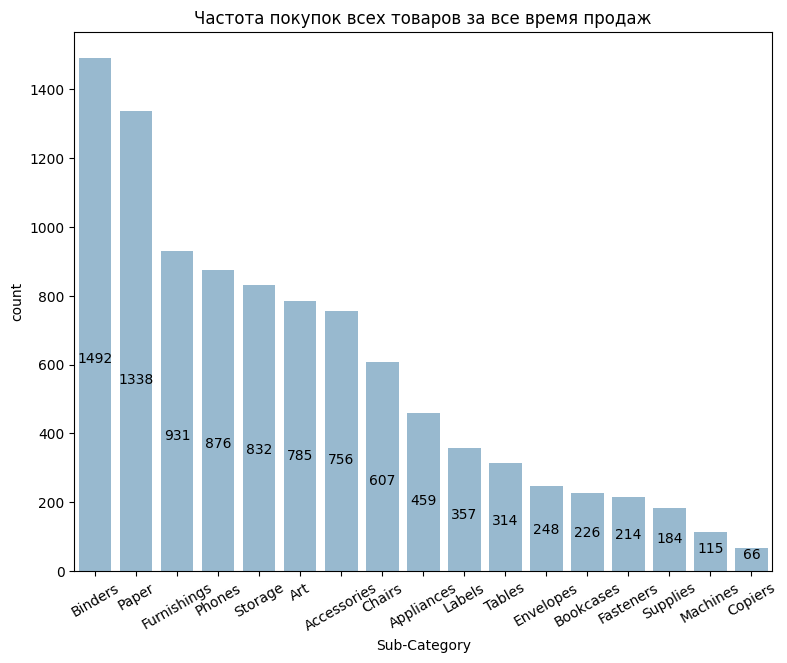

In [110]:
fg, axes = plt.subplots(figsize = (9,7))

sns.barplot(x= data['Sub-Category'].value_counts().index,
            y = data['Sub-Category'].value_counts(), ax = axes,
            alpha = 0.5)
plt.xticks(rotation=30)
autolabel(axes.patches, height_factor=0.4)
plt.title("Частота покупок всех товаров за все время продаж")
plt.show()

На столбчатой диаграмме показаны 4 самых часто покупаемых товара за все время продаж.

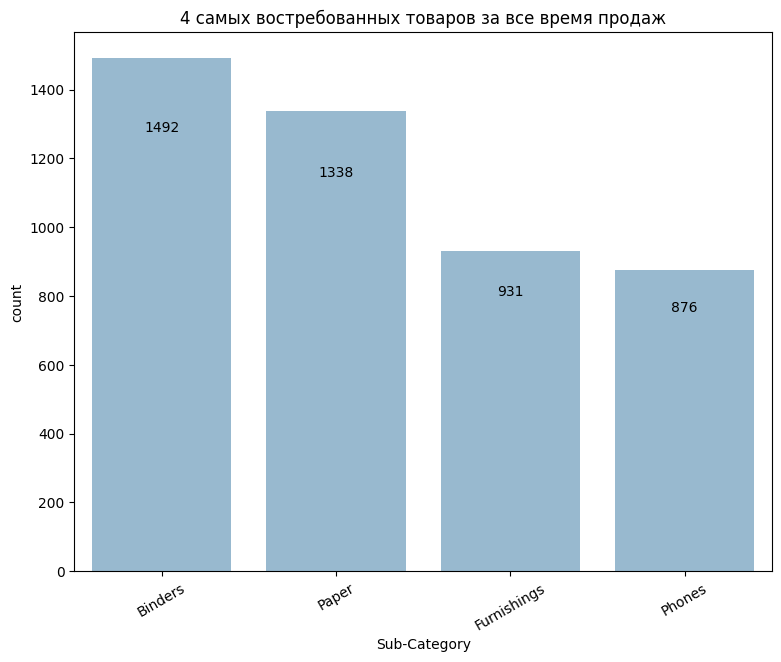

In [109]:
fg, axes = plt.subplots(figsize = (9,7))

sns.barplot(x= data['Sub-Category'].value_counts().head(4).index,
            y = data['Sub-Category'].value_counts().head(4), ax = axes,
            alpha = 0.5)
plt.xticks(rotation=30)
autolabel(axes.patches, height_factor=0.85)
plt.title("4 самых востребованных товаров за все время продаж")
plt.show()

In [42]:
data['Sub-Category'].value_counts().head(4)

,count
Sub-Category,
Binders,1492
Paper,1338
Furnishings,931
Phones,876


In [134]:
data_tmp = data['Order Date'].str.split('/',expand=True)
data_tmp.columns=['day','month','year']
data_tmp['year'] = data_tmp['year'].astype(int)

In [135]:
df = pd.concat([data,data_tmp],axis=1)

Ниже представлена стобчатая диаграмма частоты покупок каждой подгруппы за 2 последних года.

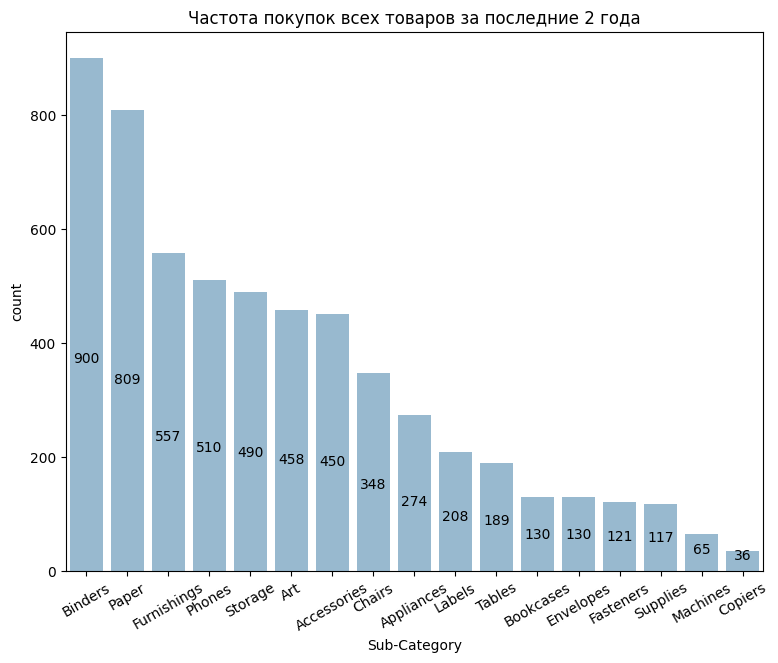

In [108]:
fg, axes = plt.subplots(figsize = (9,7))

sns.barplot(x= df[(df['year']==df['year'].max()) | (df['year']==int(df['year'].max())-1)]['Sub-Category'].value_counts().index,
            y = df[(df['year']==df['year'].max()) | (df['year']==int(df['year'].max())-1)]['Sub-Category'].value_counts(), ax = axes,
            alpha = 0.5)
plt.xticks(rotation=30)
autolabel(axes.patches, height_factor=0.4)
plt.title("Частота покупок всех товаров за последние 2 года")
plt.show()

На столбчатой диаграмме показаны 4 самых часто покупаемых товара за последние 2 года.

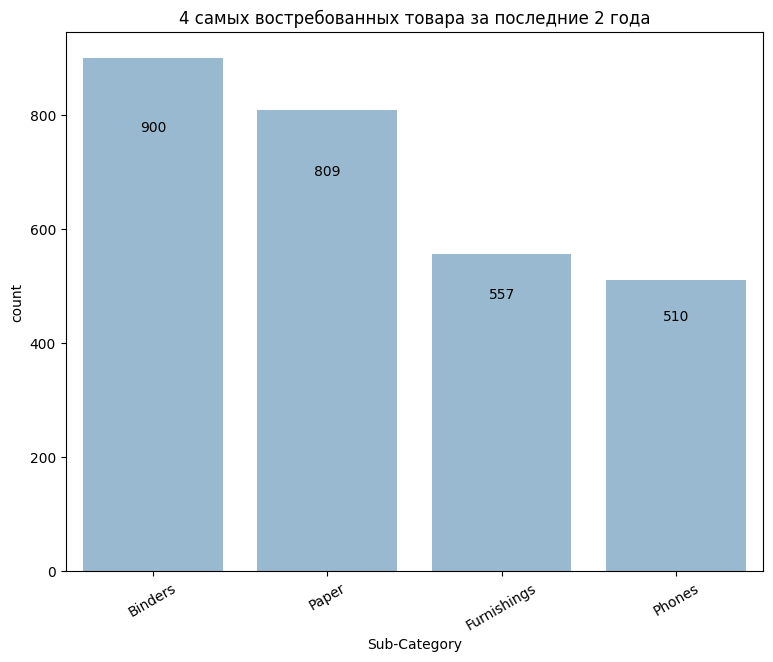

In [107]:
fg, axes = plt.subplots(figsize = (9,7))

sns.barplot(x= df[(df['year']==df['year'].max()) | (df['year']==int(df['year'].max())-1)]['Sub-Category'].value_counts().head(4).index,
            y = df[(df['year']==df['year'].max()) | (df['year']==int(df['year'].max())-1)]['Sub-Category'].value_counts().head(4), ax = axes,
            alpha = 0.5)
plt.xticks(rotation=30)
autolabel(axes.patches, height_factor=0.85)
plt.title("4 самых востребованных товара за последние 2 года")
plt.show()

In [89]:
df[(df['year']==df['year'].max()) | (df['year']==int(df['year'].max())-1)]['Sub-Category'].value_counts().head(4)

,count
Sub-Category,
Binders,900
Paper,809
Furnishings,557
Phones,510


Ниже представлена стобчатая диаграмма частоты покупок каждой подгруппы за последний год.

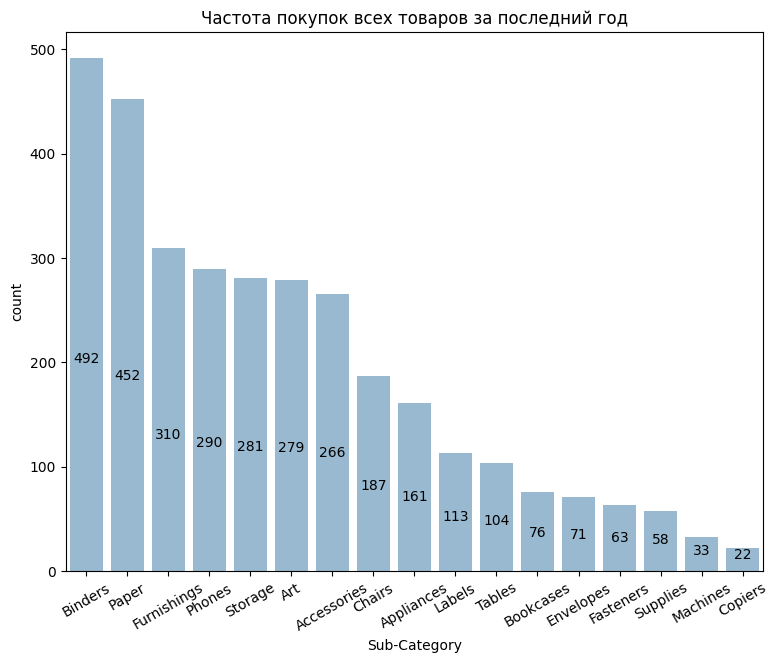

In [106]:
fg, axes = plt.subplots(figsize = (9,7))

sns.barplot(x= df[df['year']==df['year'].max()]['Sub-Category'].value_counts().index,
            y = df[df['year']==df['year'].max()]['Sub-Category'].value_counts(), ax = axes,
            alpha = 0.5)
plt.xticks(rotation=30)
autolabel(axes.patches, height_factor=0.4)
plt.title("Частота покупок всех товаров за последний год")
plt.show()

На столбчатой диаграмме показаны 4 самых часто покупаемых товара за последний год.

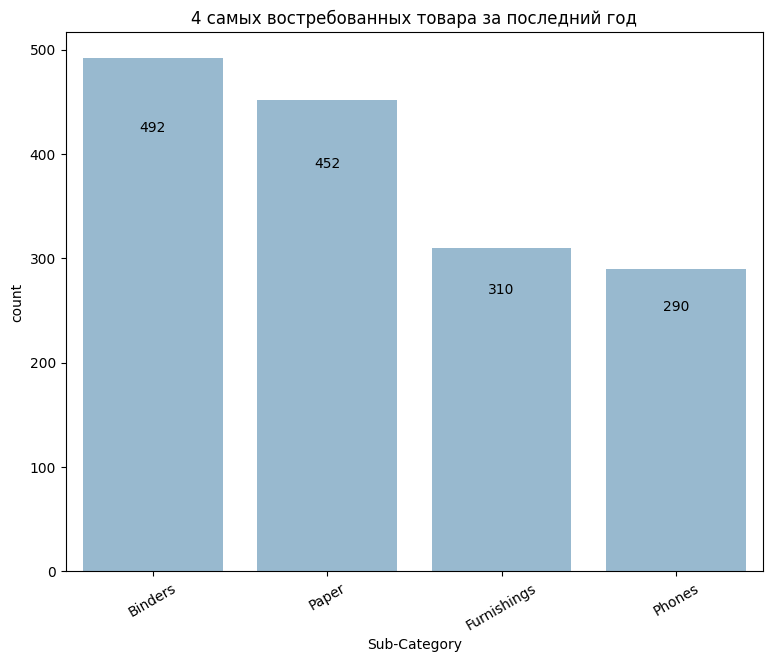

In [100]:
fg, axes = plt.subplots(figsize = (9,7))

sns.barplot(x= df[df['year']==df['year'].max()]['Sub-Category'].value_counts().head(4).index,
            y = df[df['year']==df['year'].max()]['Sub-Category'].value_counts().head(4), ax = axes,
            alpha = 0.5)
plt.xticks(rotation=30)
autolabel(axes.patches, height_factor=0.85)
plt.title("4 самых востребованных товара за последний год")
plt.show()

In [81]:
df[df['year']==df['year'].max()]['Sub-Category'].value_counts().head(4)

,count
Sub-Category,
Binders,492
Paper,452
Furnishings,310
Phones,290


## ВЫВОД

In [142]:
last_year = np.asarray(df[df['year']==df['year'].max()]['Sub-Category'].value_counts().head(4))
last_2_year =np.asarray(df[(df['year']==df['year'].max()) | (df['year']==int(df['year'].max())-1)]['Sub-Category'].value_counts().head(4))
all = np.asarray(data['Sub-Category'].value_counts().head(4))
val = np.vstack([last_year, last_2_year, all])

In [152]:
df = pd.DataFrame(val.T,
index=data['Sub-Category'].value_counts().head(4).index,
columns=pd.Index(['Last year', 'Last 2 years', 'All time'], name='Period'))

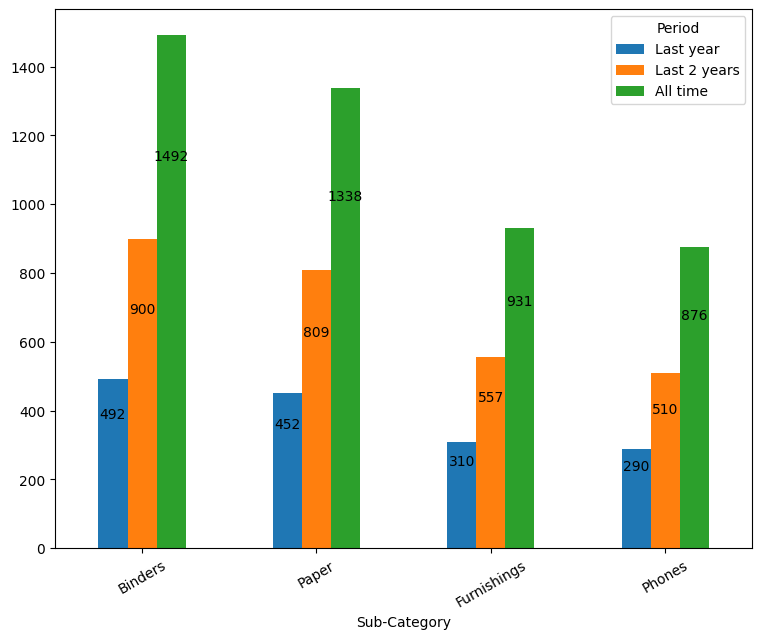

In [153]:
fg, axes = plt.subplots(figsize = (9,7))
df.plot.bar(ax=axes)
plt.xticks(rotation=30)
autolabel(axes.patches, height_factor=0.75)

Самые востребованные категории товаров: Binders, Paper, Furnishings, Phones.

## Задание 2

In [168]:
ds = data.copy()

In [169]:
ds['Sales'] = ds['Sales'].str.replace(',', '.')

In [173]:
ds['Sales'] = ds['Sales'].astype(float)

## По коробчатой диаграмме выбросов не видим


<Axes: >

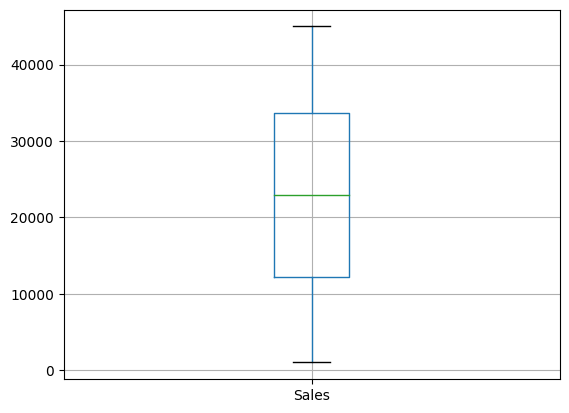

In [209]:
ds.boxplot(column=['Sales'])

In [178]:
ds['Sales'].max()

44995.41

Проверим наличие выбросов с помощью правила 3х сигм

In [192]:
mean = ds['Sales'].mean()
std = ds['Sales'].std()
std_outlier_threshold_bottom = mean - 3*std
std_outlier_threshold_up = mean + 3*std

print("Mean: "+str(round(mean)))
print("Std: "+str(round(std)))
print("Bottom threshold: "+str(round(std_outlier_threshold_bottom)))
print("Upper threshold: "+str(round(std_outlier_threshold_up)))
print("Max values in Sales: "+str(round(ds['Sales'].max())))

Mean: 22922
Std: 12602
Bottom threshold: -14884
Upper threshold: 60728
Max values in Sales: 44995


In [188]:
std_no_outliers = ds[ds['Sales'] <= std_outlier_threshold_up]

## Можно увидеть, что при использовании правила 3х сигм выбросы не были обнаружены
На среднее по данным сильно влияниют выбросы, однако среднее не изменилось

In [189]:
print("Mean with outliers: " +str(round(ds['Sales'].mean(),2)))
print("Mean without outliers std: "+str(round(std_no_outliers['Sales'].mean(),2)))

Mean with outliers: 22921.76
Mean without outliers std: 22921.76


<ipython-input-210-4b26d41a33db>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Sales'],


<Axes: xlabel='Sales', ylabel='Density'>

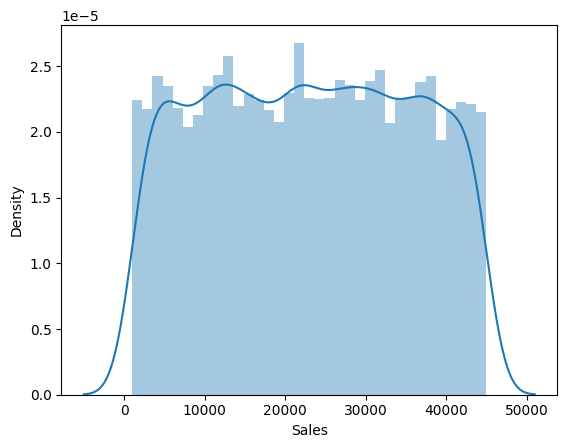

In [210]:
sns.distplot(ds['Sales'], bins=int(35))


Проверим наличие выбросов с помощью метода IQR

In [198]:
iqr = ds['Sales'].quantile(0.75) - ds['Sales'].quantile(0.25)

In [199]:
q1 = ds['Sales'].quantile(0.25)
iqr_outlier_threshold_up = q1 + 1.5*iqr
iqr_outlier_threshold_bottom = q1 - 1.5*iqr

print("Iqr: "+str(round(iqr)))
print("Bottom threshold: "+str(round(iqr_outlier_threshold_bottom)))
print("Upper threshold: "+str(round(iqr_outlier_threshold_up)))


Iqr: 21595
Bottom threshold: -20256
Upper threshold: 44527


С помощью данного метода обнаружены выбросы

In [200]:
ds[ds['Sales'] > iqr_outlier_threshold_up].shape

(102, 5)

In [201]:
outlier = ds[ds['Sales'] > iqr_outlier_threshold_up]
outlier.head(5)

,Order Date,Class,Region,Sub-Category,Sales
ID,,,,,
573,28/12/2018,Стандарт,Владивосток,Binders,44558.37
2424,25/12/2018,Стандарт,Владивосток,Accessories,44654.52
7608,24/12/2018,Первый класс,Урал,Storage,44722.59
6205,01/12/2018,Первый класс,Владивосток,Furnishings,44684.45
4775,23/11/2018,Стандарт,Урал,Phones,44864.40


In [205]:
print("Mean with outliers: " +str(round(ds['Sales'].mean(),2)))
print("Mean without outliers iqr: "+str(round(iqr_no_outliers['Sales'].mean(),2)))

Mean with outliers: 22921.76
Mean without outliers iqr: 22692.16


In [204]:
data_no_outliers = ds[ds['Sales'] <= iqr_outlier_threshold_up]

<ipython-input-211-0853cde4b321>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_outliers['Sales'], bins=int(35))


<Axes: xlabel='Sales', ylabel='Density'>

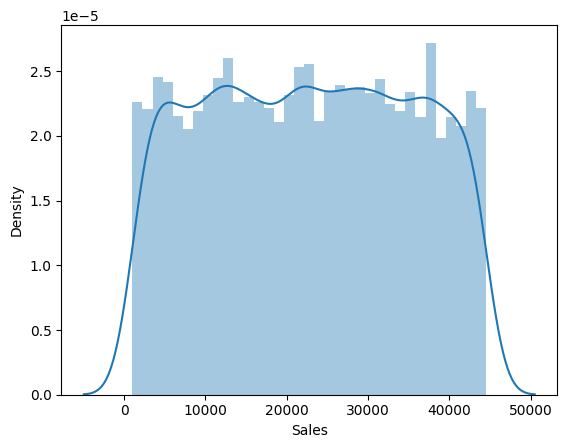

In [211]:
sns.distplot(data_no_outliers['Sales'], bins=int(35))

## ВЫВОД
При исопльзовании метода 3х сигм выбросы не были обнаружены, распределение данных стремится к равномерному
При использовании метода IQR выбросы были обнаружены, однако при исключении обнаруженных выбросов распределение все так же стремится к равномерному

## Задание 3

In [214]:
ds['Sale_group'] = pd.qcut(ds['Sales'], q=3, labels=["low", "average", " high"])

Ниже представлена столбчатая диаграмма распределения групп цен по городам

In [260]:
count_df = ds.groupby(['Region', 'Sale_group']).agg({'Sales': ['count']})

<ipython-input-260-bdfcd1df64fa>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = ds.groupby(['Region', 'Sale_group']).agg({'Sales': ['count']})


По столбчатой диаграмме ниже видим, что по трем группам больше всего продаж в Калининграде

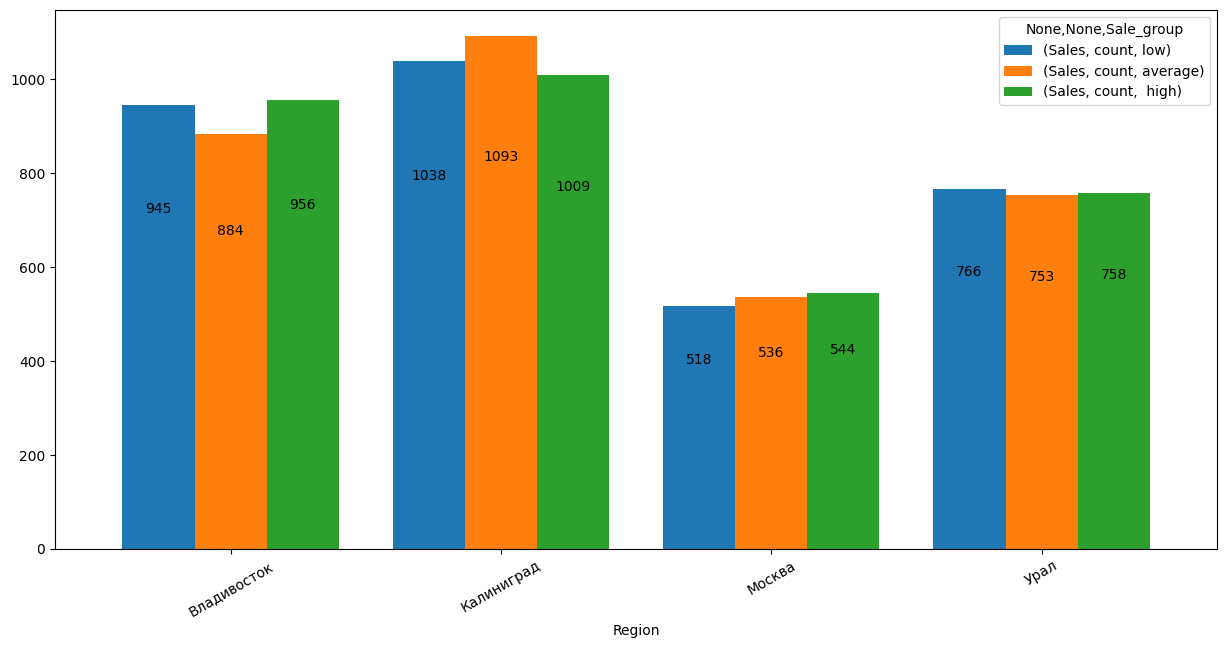

In [262]:
fg, axes = plt.subplots(figsize = (15,7))
count_df.unstack().plot(ax=axes,kind='bar', width=0.8, linewidth=1.0)
plt.xticks(rotation=30)
autolabel(axes.patches, height_factor=0.75)

In [263]:
count_group = ds.groupby(['Sale_group', 'Region']).agg({'Sales': ['count']})

<ipython-input-263-9572ff736a2d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_group = ds.groupby(['Sale_group', 'Region']).agg({'Sales': ['count']})


По диаграмме ниже также видно, что в Калиниграде больше продаж, чем в других регионах.

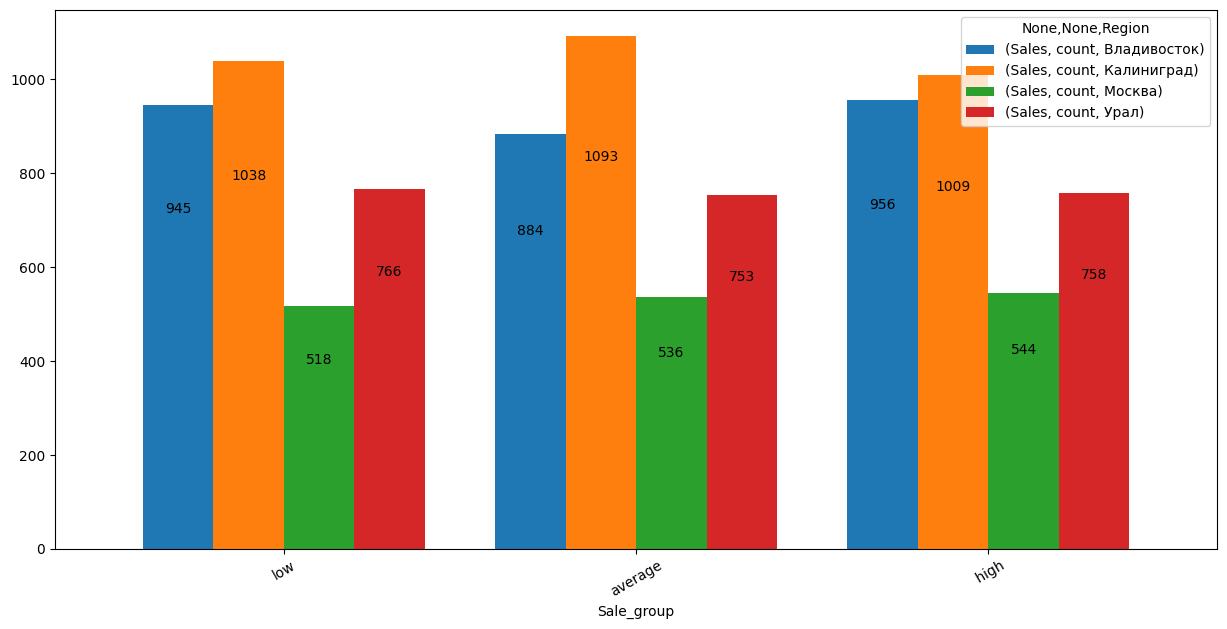

In [264]:
fg, axes = plt.subplots(figsize = (15,7))
count_group.unstack().plot(ax=axes,kind='bar', width=0.8, linewidth=1.0)
plt.xticks(rotation=30)
autolabel(axes.patches, height_factor=0.75)

## Вывод
Самым прибыльным регионом является Калининград, меньше всего продаж осуществляется в Москве.